**Classification of emails as spam or not spam using naive bayes classification**

In [3]:
#imports 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, f1_score, recall_score
import pickle

In [4]:
#reading csv file
email_df=pd.read_csv("emails.csv")
email_df.head()

,Unnamed: 0,Subject,Label
0,0,subject: enron methanol ; meter # : 988291\r\n...,0
1,1,"subject: hpl nom for january 9 , 2001\r\n( see...",0
2,2,"subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,3,"subject: photoshop , windows , office . cheap ...",1
4,4,subject: re : indian springs\r\nthis deal is t...,0


In [5]:
#test trin split 
X_train,X_test,y_train,y_test = train_test_split(email_df.Subject, email_df.Label,test_size=0.20)


In [6]:
clf_pipeline = Pipeline([
    ("vectorizer", CountVectorizer()),
    ("nb_classifier", MultinomialNB(class_prior=[0.3,0.7])),
])

Training the model

In [7]:
clf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('nb_classifier', MultinomialNB(class_prior=[0.3, 0.7]))])

In [8]:
y_prediction=clf_pipeline.predict(X_test)
y_prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [9]:
clf_pipeline.score(X_test, y_test)

0.9739130434782609

implementing cross validation

In [10]:
validation_score = cross_val_score(clf_pipeline,X_test,y_test)
print(validation_score)

[0.95652174 0.95169082 0.93719807 0.95169082 0.9468599 ]


In [11]:
#f1 score
f1_score(y_prediction,y_test,average=None)

array([0.9817197, 0.9544688])

In [12]:
#recall score
recall_score(y_prediction,y_test,average=None)

array([0.98238482, 0.95286195])

In [13]:
cm = confusion_matrix(y_test, y_prediction)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[725  14]
 [ 13 283]]


<Axes: >

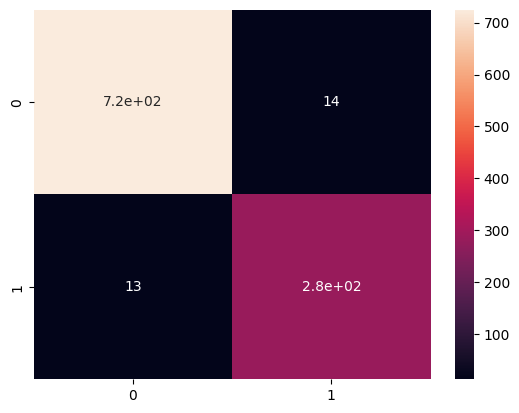

In [14]:
sns.heatmap(cm,annot=True)

Save file as a pickle file

In [15]:
with open('spam_classifier.pkl', 'wb') as model_file:
    pickle.dump(clf_pipeline, model_file)